## **The Problem**

In many barangays, residents struggle to formally report local issues due to lack of access, anonymity concerns, or unclear complaint channels. This results in unreported problems, delayed responses, and inefficient resource allocation.




According to my interview in one brgy secretary, there are only 3 to 5 complaints per month. The usual complaints are about money, credits and slander. Although rare, there are cases about land problem, physical injuries and motorcycle accidents

These are too little accounts of complaints and we can only assume for more possible complaints based on how we live and participate in our own barangays. 

For example in our barangay, it is water inconsistency every 6am until 11am on weekdays, and 8am until 12 pm on weekends.
Next is lack of public information or announcement to the programs and new services that can be avail in the barangay  

Categories:
1. Public Concern (garbage and sanitation)
2. Public Concern (infrastructure issues)
3. Public Concern (programs and services)
4. Public Concern (community and financial disputes)
5. Public Concern (security and safety)


## **Objective**

To address the problem, I developed the Online Sumbong Complaint Classification System which is a machine learning-based tool that allows citizens to anonymously submit complaints in Tagalog, which are then automatically classified into predefined categories. This supports faster triage and aligns with ongoing efforts like the Barangay Tanod Tracker and Appointment System, enabling a more responsive local government.

## **Citation**

This project uses XLM-RoBERTa, a multilingual transformer developed by Facebook AI (Conneau et al., 2019).

# **Data Preparation**

I used gemino pro and deepseek r1 to generate high quality dataset.
The independent variable is the complaint, while the dependent variable is the five possible categories. 

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df_1= pd.read_csv('new_translated_df.csv')

In [ ]:
print(df_1.shape)
df_1

(958, 2)


,complaint,label
0,"Kapitan, dalawang linggo nang hindi nakakakuha...",1
1,"Ang kanal sa amin sa ilang kalye, clogged muli...",1
2,Mayroon kaming mga kapitbahay na itinapon lama...,1
3,Ang dami ng mga ipis at daga ay matindi dahil ...,1
4,Mangyaring kumilos sa dumi ng baka na nakakala...,1
...,...,...
953,Walang street lights papunta sa sementeryo. Na...,2
954,"Yung health station po, walang kagamitan at la...",2
955,Sana po ayusin ang public library. Para po may...,2
956,"Yung tulay na kawayan, inanod na ng baha. Paan...",2


In [ ]:
label_map = {
    0: 'public concern (community and financial disputes)',
    1: 'public concern (garbage and sanitation)',
    2:'public concern (infrastructure issues)',
    3:"public concern (programs and services)", 
    4:"public concern (security and safety)"

}

df_1['category'] = df_1['label'].map(label_map)
df_1

,complaint,label,category
0,"Kapitan, dalawang linggo nang hindi nakakakuha...",1,public concern (garbage and sanitation)
1,"Ang kanal sa amin sa ilang kalye, clogged muli...",1,public concern (garbage and sanitation)
2,Mayroon kaming mga kapitbahay na itinapon lama...,1,public concern (garbage and sanitation)
3,Ang dami ng mga ipis at daga ay matindi dahil ...,1,public concern (garbage and sanitation)
4,Mangyaring kumilos sa dumi ng baka na nakakala...,1,public concern (garbage and sanitation)
...,...,...,...
953,Walang street lights papunta sa sementeryo. Na...,2,public concern (infrastructure issues)
954,"Yung health station po, walang kagamitan at la...",2,public concern (infrastructure issues)
955,Sana po ayusin ang public library. Para po may...,2,public concern (infrastructure issues)
956,"Yung tulay na kawayan, inanod na ng baha. Paan...",2,public concern (infrastructure issues)


In [ ]:
del df_1['label']

Because of the initial accuracy of only 70%, i chose to add a little bit more dataset.

In [ ]:
df_2 = pd.read_csv('gemini_pro_3.csv')
df_2['category'] = df_2['category'].str.lower()
print(df_2['category'].value_counts())
df_2.head()

category
public concern (security and safety)                 9
public concern (community and financial disputes)    9
public concern (programs and services)               9
public concern (infrastructure issues)               8
public concern (garbage and sanitation)              5
Name: count, dtype: int64


,complaint,category
0,"Kap, paki-check naman po yung poste ng ilaw sa...",public concern (security and safety)
1,May mga nag-iinuman na naman po sa kanto at na...,public concern (security and safety)
2,Inirereklamo ko po yung kapitbahay kong si Man...,public concern (community and financial disputes)
3,Good morning po. Gusto ko lang po sana i-follo...,public concern (programs and services)
4,"Yung kalsada po sa amin sa may Purok 3, lubak-...",public concern (infrastructure issues)


In [ ]:
df_3 = pd.read_csv('deepseek_new_3.csv')
df_3['category'] = df_3['category'].str.lower()
print(df_3['category'].value_counts())
df_3.head()

category
public concern (community and financial disputes)    9
public concern (programs and services)               9
public concern (infrastructure issues)               9
public concern (security and safety)                 9
public concern (garbage and sanitation)              9
Name: count, dtype: int64


,complaint,category
0,"Yung kapitbahay namin, nagpapalabas ng malakas...",public concern (community and financial disputes)
1,Hindi maasikaso ang request ko para sa baranga...,public concern (programs and services)
2,May mga poste ng kuryente sa Gomez St. na halo...,public concern (infrastructure issues)
3,Wala man lang tanod na nagbabantay sa palengke...,public concern (security and safety)
4,Ang daming daga sa may basurahan malapit sa he...,public concern (garbage and sanitation)


### **Joining the three df**

In [ ]:
df = pd.concat([df_1, df_2, df_3])

Note: I performed basic cleaning to the independent variable, like removing punctuations and stop words but it did not result from a better accuracy.

### **Converting the categories to numerical variables**

We can use the LabelEncoder() function from sklearn, but we can also just use simple python scripts to do it.

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Encode labels
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['category'])


Checking the distribution of the categories

In [ ]:
df.label.value_counts()

label
1    218
2    214
3    205
4    204
0    200
Name: count, dtype: int64

Making sure there is no duplicate

In [ ]:
df = df.drop_duplicates()

In [ ]:
original_classes = label_encoder.classes_
print("Original categories (ordered by their assigned number):")
print(original_classes)

Original classification (ordered by their assigned number):
['public concern (community and financial disputes)'
 'public concern (garbage and sanitation)'
 'public concern (infrastructure issues)'
 'public concern (programs and services)'
 'public concern (security and safety)']


### **Splitting the dataset**

I split the dataset to the usual 80-20 method

In [ ]:
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
len(train_df), len(val_df)

(832, 209)

### **Importing the transformer model**

I also used the bert-tagalog-based-uncased model, unfortunately it does not show a better result

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

model_name = "xlm-roberta-base" 
model_name2 = "jcblaise/bert-tagalog-base-uncased"

# Initialize tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_name)
tokenizer2 = AutoTokenizer.from_pretrained(model_name2)

### **Creating a Pytorch Dataset**

Converting the text based dataset to a torch dataset. As we know, the model can only understand numerical values (arrays/matrices)

In [ ]:
import torch
from torch.utils.data import Dataset

class ComplaintDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=128):
        self.encodings = tokenizer(
            texts.tolist(),
            truncation=True,
            padding=True,
            max_length=max_length,
            return_tensors="pt"
        )
        self.labels = torch.tensor(labels.tolist())
    
    def __getitem__(self, idx):
        return {
            'input_ids': self.encodings['input_ids'][idx],
            'attention_mask': self.encodings['attention_mask'][idx],
            'labels': self.labels[idx]
        }
    
    def __len__(self):
        return len(self.labels)

In [ ]:
# Create datasets
train_dataset = ComplaintDataset(
    train_df['complaint'], 
    train_df['label'], 
    tokenizer
)

val_dataset = ComplaintDataset(
    val_df['complaint'], 
    val_df['label'], 
    tokenizer
)

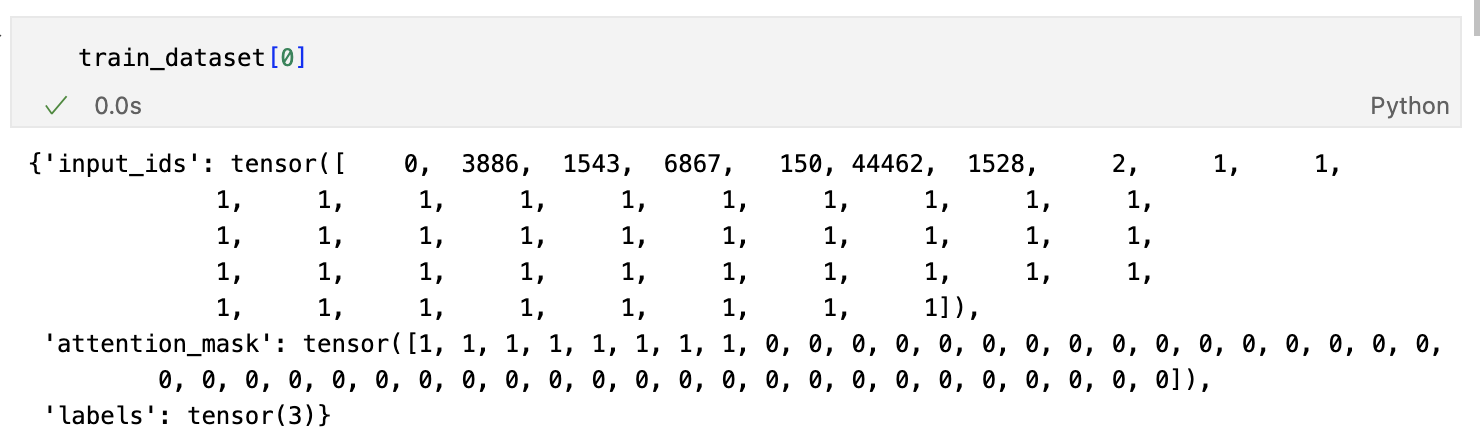

input_ids = these are the tokenized and encoded numbers from the original text/complaint

attention_mask = tells the model what tokens need to be ignored or not

labels = the category

### **Training the model**

We will use sklean metrics for the metrics calculation

In [ ]:
from transformers import TrainingArguments, Trainer
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, classification_report, accuracy_score, precision_recall_fscore_support

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = logits.argmax(axis=-1)

    precision, recall, f1, _ = precision_recall_fscore_support(
        labels, predictions, average='weighted'
    )
    acc = accuracy_score(labels, predictions)

    # Report per category
    target_names = label_encoder.classes_
    print("\n" + classification_report(labels, predictions, target_names=target_names))

    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall,
    }



In [ ]:
# Training parameters
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=10,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=32,
    learning_rate=2e-5,
    weight_decay=0.01,
    eval_strategy="epoch",
    save_strategy="epoch",
    logging_dir='./logs',
    logging_steps=50,
    load_best_model_at_end=True,
    metric_for_best_model="f1",
)

Learning rate of **2e-5** = a small learning rate for a pre-trained model like xlm-roberta to prevent destroying the knowledge it already learned 

Weight Decay of **0.01** = Since we only have 800+ traning datasets, weight decay prevent the model for overfitting (model memorizes rather than generalizing). Although, 0.01 is the default

Model 1

In [66]:
# Initialize model
model = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels=len(label_encoder.classes_)
)

# Create trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics
)


Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model 2

In [25]:
# Initialize model
model2 = AutoModelForSequenceClassification.from_pretrained(
    model_name2,
    num_labels=len(label_encoder.classes_)
)

# Create trainer
trainer2 = Trainer(
    model=model2,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics
)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at jcblaise/bert-tagalog-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [67]:
# Start training!
trainer.train()

/Users/johnjomari/Documents/Jom/dep_project3/my_venv/lib/python3.13/site-packages/torch/utils/data/dataloader.py:683: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,1.572400,1.465764,0.306220,0.216197,0.332924,0.306220
2,1.320000,1.113632,0.574163,0.526314,0.698740,0.574163
3,0.934400,0.800586,0.741627,0.747014,0.791279,0.741627
4,0.649900,0.682624,0.779904,0.783288,0.807020,0.779904
5,0.577800,0.655233,0.779904,0.782754,0.804711,0.779904
6,0.441200,0.552207,0.842105,0.844376,0.850056,0.842105
7,0.367900,0.607801,0.827751,0.830566,0.845291,0.827751
8,0.269600,0.580754,0.846890,0.846457,0.848972,0.846890
9,0.195300,0.592023,0.832536,0.834181,0.838214,0.832536
10,0.230900,0.613438,0.846890,0.849240,0.858012,0.846890



                                                   precision    recall  f1-score   support

public concern (community and financial disputes)       0.00      0.00      0.00        50
          public concern (garbage and sanitation)       0.85      0.54      0.66        41
           public concern (infrastructure issues)       0.67      0.05      0.10        39
           public concern (programs and services)       0.00      0.00      0.00        39
             public concern (security and safety)       0.22      1.00      0.36        40

                                         accuracy                           0.31       209
                                        macro avg       0.35      0.32      0.22       209
                                     weighted avg       0.33      0.31      0.22       209



/Users/johnjomari/Documents/Jom/dep_project3/my_venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/johnjomari/Documents/Jom/dep_project3/my_venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/johnjomari/Documents/Jom/dep_project3/my_venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi


                                                   precision    recall  f1-score   support

public concern (community and financial disputes)       1.00      0.08      0.15        50
          public concern (garbage and sanitation)       0.79      0.76      0.78        41
           public concern (infrastructure issues)       0.44      0.92      0.60        39
           public concern (programs and services)       0.68      0.69      0.68        39
             public concern (security and safety)       0.50      0.55      0.52        40

                                         accuracy                           0.57       209
                                        macro avg       0.68      0.60      0.55       209
                                     weighted avg       0.70      0.57      0.53       209



/Users/johnjomari/Documents/Jom/dep_project3/my_venv/lib/python3.13/site-packages/torch/utils/data/dataloader.py:683: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)



                                                   precision    recall  f1-score   support

public concern (community and financial disputes)       0.88      0.74      0.80        50
          public concern (garbage and sanitation)       0.84      0.76      0.79        41
           public concern (infrastructure issues)       0.52      0.95      0.67        39
           public concern (programs and services)       0.90      0.72      0.80        39
             public concern (security and safety)       0.79      0.55      0.65        40

                                         accuracy                           0.74       209
                                        macro avg       0.79      0.74      0.74       209
                                     weighted avg       0.79      0.74      0.75       209



/Users/johnjomari/Documents/Jom/dep_project3/my_venv/lib/python3.13/site-packages/torch/utils/data/dataloader.py:683: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)



                                                   precision    recall  f1-score   support

public concern (community and financial disputes)       0.89      0.78      0.83        50
          public concern (garbage and sanitation)       0.87      0.80      0.84        41
           public concern (infrastructure issues)       0.59      0.92      0.72        39
           public concern (programs and services)       0.94      0.79      0.86        39
             public concern (security and safety)       0.73      0.60      0.66        40

                                         accuracy                           0.78       209
                                        macro avg       0.80      0.78      0.78       209
                                     weighted avg       0.81      0.78      0.78       209



/Users/johnjomari/Documents/Jom/dep_project3/my_venv/lib/python3.13/site-packages/torch/utils/data/dataloader.py:683: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)



                                                   precision    recall  f1-score   support

public concern (community and financial disputes)       0.89      0.68      0.77        50
          public concern (garbage and sanitation)       0.80      0.88      0.84        41
           public concern (infrastructure issues)       0.70      0.90      0.79        39
           public concern (programs and services)       1.00      0.77      0.87        39
             public concern (security and safety)       0.61      0.70      0.65        40

                                         accuracy                           0.78       209
                                        macro avg       0.80      0.78      0.78       209
                                     weighted avg       0.80      0.78      0.78       209



/Users/johnjomari/Documents/Jom/dep_project3/my_venv/lib/python3.13/site-packages/torch/utils/data/dataloader.py:683: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)



                                                   precision    recall  f1-score   support

public concern (community and financial disputes)       0.91      0.84      0.88        50
          public concern (garbage and sanitation)       0.88      0.88      0.88        41
           public concern (infrastructure issues)       0.73      0.85      0.79        39
           public concern (programs and services)       0.97      0.87      0.92        39
             public concern (security and safety)       0.74      0.78      0.76        40

                                         accuracy                           0.84       209
                                        macro avg       0.85      0.84      0.84       209
                                     weighted avg       0.85      0.84      0.84       209



/Users/johnjomari/Documents/Jom/dep_project3/my_venv/lib/python3.13/site-packages/torch/utils/data/dataloader.py:683: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)



                                                   precision    recall  f1-score   support

public concern (community and financial disputes)       0.93      0.76      0.84        50
          public concern (garbage and sanitation)       0.90      0.88      0.89        41
           public concern (infrastructure issues)       0.69      0.92      0.79        39
           public concern (programs and services)       0.97      0.85      0.90        39
             public concern (security and safety)       0.71      0.75      0.73        40

                                         accuracy                           0.83       209
                                        macro avg       0.84      0.83      0.83       209
                                     weighted avg       0.85      0.83      0.83       209



/Users/johnjomari/Documents/Jom/dep_project3/my_venv/lib/python3.13/site-packages/torch/utils/data/dataloader.py:683: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)



                                                   precision    recall  f1-score   support

public concern (community and financial disputes)       0.87      0.90      0.88        50
          public concern (garbage and sanitation)       0.90      0.88      0.89        41
           public concern (infrastructure issues)       0.74      0.82      0.78        39
           public concern (programs and services)       0.88      0.90      0.89        39
             public concern (security and safety)       0.85      0.72      0.78        40

                                         accuracy                           0.85       209
                                        macro avg       0.85      0.84      0.84       209
                                     weighted avg       0.85      0.85      0.85       209



/Users/johnjomari/Documents/Jom/dep_project3/my_venv/lib/python3.13/site-packages/torch/utils/data/dataloader.py:683: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)



                                                   precision    recall  f1-score   support

public concern (community and financial disputes)       0.89      0.80      0.84        50
          public concern (garbage and sanitation)       0.92      0.88      0.90        41
           public concern (infrastructure issues)       0.76      0.82      0.79        39
           public concern (programs and services)       0.90      0.90      0.90        39
             public concern (security and safety)       0.70      0.78      0.74        40

                                         accuracy                           0.83       209
                                        macro avg       0.84      0.83      0.83       209
                                     weighted avg       0.84      0.83      0.83       209



/Users/johnjomari/Documents/Jom/dep_project3/my_venv/lib/python3.13/site-packages/torch/utils/data/dataloader.py:683: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)



                                                   precision    recall  f1-score   support

public concern (community and financial disputes)       0.93      0.80      0.86        50
          public concern (garbage and sanitation)       0.92      0.88      0.90        41
           public concern (infrastructure issues)       0.74      0.90      0.81        39
           public concern (programs and services)       0.94      0.87      0.91        39
             public concern (security and safety)       0.73      0.80      0.76        40

                                         accuracy                           0.85       209
                                        macro avg       0.85      0.85      0.85       209
                                     weighted avg       0.86      0.85      0.85       209



TrainOutput(global_step=520, training_loss=0.6376938086289626, metrics={'train_runtime': 220.6185, 'train_samples_per_second': 37.712, 'train_steps_per_second': 2.357, 'total_flos': 205232151121920.0, 'train_loss': 0.6376938086289626, 'epoch': 10.0})

## **Evaluating the result**

In [ ]:
pred_output = trainer.predict(val_dataset)

y_pred = pred_output.predictions.argmax(axis=1)  
y_true = pred_output.label_ids                  


/Users/johnjomari/Documents/Jom/dep_project3/my_venv/lib/python3.13/site-packages/torch/utils/data/dataloader.py:683: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)



                                                   precision    recall  f1-score   support

public concern (community and financial disputes)       0.93      0.80      0.86        50
          public concern (garbage and sanitation)       0.92      0.88      0.90        41
           public concern (infrastructure issues)       0.74      0.90      0.81        39
           public concern (programs and services)       0.94      0.87      0.91        39
             public concern (security and safety)       0.73      0.80      0.76        40

                                         accuracy                           0.85       209
                                        macro avg       0.85      0.85      0.85       209
                                     weighted avg       0.86      0.85      0.85       209



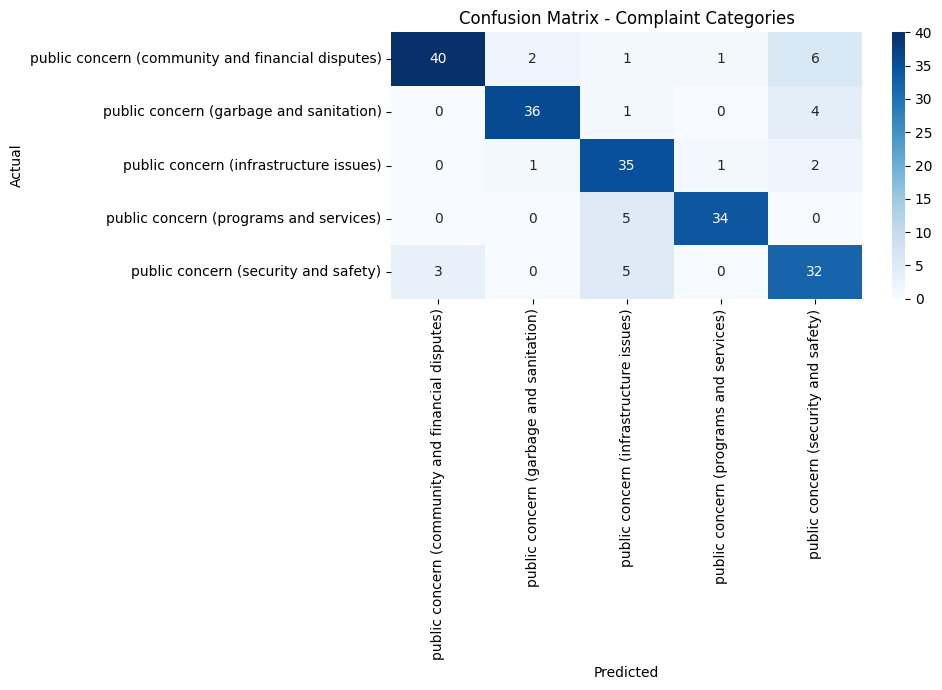

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

labels = original_classes  

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Complaint Categories')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [83]:
y_pred

array([2, 3, 2, 4, 4, 2, 4, 3, 1, 4, 2, 0, 1, 4, 1, 4, 4, 2, 0, 3, 2, 4,
       2, 2, 2, 3, 4, 2, 3, 1, 0, 1, 3, 0, 2, 1, 0, 0, 0, 2, 0, 4, 4, 2,
       4, 4, 0, 4, 2, 1, 3, 3, 4, 1, 3, 1, 1, 1, 1, 4, 3, 2, 0, 4, 3, 1,
       2, 1, 0, 3, 3, 0, 0, 4, 1, 3, 1, 3, 1, 3, 0, 1, 2, 2, 4, 1, 2, 1,
       0, 2, 0, 3, 4, 2, 4, 3, 4, 4, 1, 0, 3, 4, 0, 1, 1, 1, 4, 4, 0, 2,
       0, 1, 4, 0, 0, 4, 2, 0, 3, 2, 0, 2, 0, 0, 4, 1, 1, 4, 3, 0, 2, 2,
       3, 2, 0, 0, 0, 4, 4, 2, 2, 0, 4, 1, 0, 2, 4, 3, 2, 1, 3, 3, 4, 1,
       3, 0, 4, 2, 4, 1, 3, 1, 3, 2, 0, 1, 2, 2, 4, 4, 2, 1, 0, 2, 2, 3,
       2, 4, 0, 3, 1, 3, 2, 0, 1, 3, 3, 1, 0, 3, 4, 4, 2, 3, 0, 2, 1, 3,
       0, 4, 2, 4, 2, 0, 0, 0, 2, 1, 2])

In [90]:
val_df['y_pred'] = y_pred
val_df['y_true'] = y_true

## **Manually evaluate the mislabeled complaints**

In [98]:
val_df

,complaint,label,category,y_pred,y_true
136,Mapanganib ang mga bata,4,public concern (security and safety),2,4
629,walang programa para sa mga senior,3,public concern (programs and services),3,3
184,Walang tubig sa CR ng Barangay,2,public concern (infrastructure issues),2,2
31,May nagsabi na may nagbebenta ng mga gamot sa ...,4,public concern (security and safety),4,4
679,sana may poste ng ilaw dito,2,public concern (infrastructure issues),4,2
...,...,...,...,...,...
618,yung mga frat members nag-aaway,4,public concern (security and safety),0,4
60,Magreklamo ako na ang aking kapitbahay ay pala...,0,public concern (community and financial disputes),0,0
843,"Yung hagdan papuntang barangay hall, sira-sira...",2,public concern (infrastructure issues),2,2
15,Nagkalat ang basura sa tabi ng ilog. May nakit...,1,public concern (garbage and sanitation),1,1


In [99]:
label_map = {
    0: 'public concern (community and financial disputes)',
    1: 'public concern (garbage and sanitation)',
    2:'public concern (infrastructure issues)',
    3:"public concern (programs and services)", 
    4:"public concern (security and safety)"

}

val_df['category_predicted'] = val_df['y_pred'].map(label_map)
val_df

,complaint,label,category,y_pred,y_true,category_predicted
136,Mapanganib ang mga bata,4,public concern (security and safety),2,4,public concern (infrastructure issues)
629,walang programa para sa mga senior,3,public concern (programs and services),3,3,public concern (programs and services)
184,Walang tubig sa CR ng Barangay,2,public concern (infrastructure issues),2,2,public concern (infrastructure issues)
31,May nagsabi na may nagbebenta ng mga gamot sa ...,4,public concern (security and safety),4,4,public concern (security and safety)
679,sana may poste ng ilaw dito,2,public concern (infrastructure issues),4,2,public concern (security and safety)
...,...,...,...,...,...,...
618,yung mga frat members nag-aaway,4,public concern (security and safety),0,4,public concern (community and financial disputes)
60,Magreklamo ako na ang aking kapitbahay ay pala...,0,public concern (community and financial disputes),0,0,public concern (community and financial disputes)
843,"Yung hagdan papuntang barangay hall, sira-sira...",2,public concern (infrastructure issues),2,2,public concern (infrastructure issues)
15,Nagkalat ang basura sa tabi ng ilog. May nakit...,1,public concern (garbage and sanitation),1,1,public concern (garbage and sanitation)


In [100]:
del val_df['label']
del val_df['y_pred']
del val_df['y_true']


In [102]:
mislabelled_dataset = val_df[val_df['category'] != val_df['category_predicted'] ]
mislabelled_dataset.to_csv('mislabelled_dataset.csv', index=False)

### **Result of the investigation**

The 32 mislabeled complaints actually does make sense in the real world. For example 

**Complaint**: "Kap, paki-check naman po yung poste ng ilaw sa dulo ng kalye, matagal nang pundi. Delikado po sa mga umuuwi ng gabi."	

**Correct Category**: public concern (security and safety)	


***Predicted Category***: public concern (infrastructure issues)

While the complaint mentions safety concerns ('Delikado sa gabi'), the root cause of the problem is the broken streetlight, which is an infrastructure issue. Therefore, the model's prediction is still logically justifiable, even if it doesn't exactly match the labeled category.

This illustrates that some misclassifications are not truly "wrong" — rather, they reflect overlapping themes in real-world complaints.

### **Trying out the model!**

In [ ]:
from transformers import AutoTokenizer
import torch

# Sample complaint
text = "Sa tinngin ko dapat bawasan natin yung mga turista kasi di nila alam magtapon sa tamang basurahan, ang iingay pa nila"

# Tokenize
inputs = tokenizer(
    text,
    truncation=True,
    padding=True,
    return_tensors="pt"
).to(model.device)


In [114]:
# Make prediction
model.eval()
with torch.no_grad():
    outputs = model(**inputs)
    logits = outputs.logits
    predicted_class_id = logits.argmax(dim=-1).item()


In [115]:
predicted_label = label_encoder.inverse_transform([predicted_class_id])[0]
print(f"Predicted category: {predicted_label}")


Predicted category: public concern (garbage and sanitation)


Putting it inside a function instead:

In [116]:
def classify_complaint(text):
    inputs = tokenizer(text, truncation=True, padding=True, return_tensors="pt").to(model.device)
    with torch.no_grad():
        logits = model(**inputs).logits
        class_id = logits.argmax(dim=-1).item()
    return label_encoder.inverse_transform([class_id])[0]


In [118]:
classify_complaint("Sa tinngin ko dapat bawasan natin yung mga turista kasi di nila alam magtapon sa tamang basurahan, ang iingay pa nila")


'public concern (garbage and sanitation)'

## **Saving the model**

In [119]:
# Save model and tokenizer
model.save_pretrained("saved_model")
tokenizer.save_pretrained("saved_model")


('saved_model/tokenizer_config.json',
 'saved_model/special_tokens_map.json',
 'saved_model/tokenizer.json')

In [120]:
import joblib

joblib.dump(label_encoder, "saved_model/label_encoder.pkl")


['saved_model/label_encoder.pkl']